# Dish Table

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_feather("../Data Files/Dish.feather")

## Description

Each entry is a dish that was sold across one or multiple menus and that were found in common; contains metadata about how often it appeared and when it made first appearance on the menus

* There are 423397 records across 9 columns

In [18]:
df.shape

(423397, 9)

In [19]:
df.dtypes

id                  int64
name               object
description       float64
menus_appeared      int64
times_appeared      int64
first_appeared      int64
last_appeared       int64
lowest_price      float64
highest_price     float64
dtype: object

In [20]:
df.head(5)

,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,1,Consomme printaniere royal,NaN,8,8,1897,1927,0.20,0.4
1,2,Chicken gumbo,NaN,111,117,1895,1960,0.10,0.8
2,3,Tomato aux croutons,NaN,13,13,1893,1917,0.25,0.4
3,4,Onion au gratin,NaN,41,41,1900,1971,0.25,1.0
4,5,St. Emilion,NaN,66,68,1881,1981,0.00,18.0


In [21]:
df.describe(include="all")

,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
count,423397.000000,423397,0.0,423397.000000,423397.000000,423397.000000,423397.000000,394297.000000,394297.000000
unique,NaN,423363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"Brandy, Mounie F.O.B.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,264456.594900,NaN,NaN,3.060489,3.146794,1675.514555,1679.299738,0.965265,1.603875
std,150489.070889,NaN,NaN,27.818178,29.962122,651.321461,651.934580,6.714564,12.696274
min,1.000000,NaN,NaN,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000
25%,132374.000000,NaN,NaN,1.000000,1.000000,1900.000000,1900.000000,0.000000,0.000000
50%,269636.000000,NaN,NaN,1.000000,1.000000,1914.000000,1917.000000,0.000000,0.000000
75%,397135.000000,NaN,NaN,1.000000,1.000000,1949.000000,1955.000000,0.400000,0.600000


## Missing Values - Section 1.1

* There is 100% of `Description` column values missing
* 6.8% of `lowest_price` column missing
* 6.8% of `highest_price` column missing

In [23]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.name = 'Percentage of Missing Values'
missing_percentage

id                  0.000000
name                0.000000
description       100.000000
menus_appeared      0.000000
times_appeared      0.000000
first_appeared      0.000000
last_appeared       0.000000
lowest_price        6.872982
highest_price       6.872982
Name: Percentage of Missing Values, dtype: float64

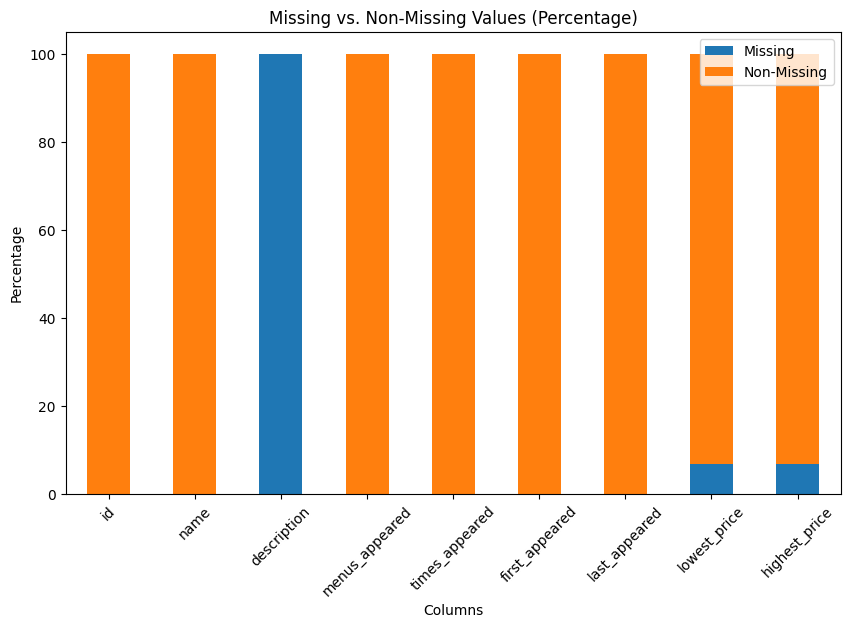

In [24]:
non_missing_percentage = 100 - missing_percentage
missing_data_percentage = pd.DataFrame({'Missing': missing_percentage, 'Non-Missing': non_missing_percentage})
missing_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Missing vs. Non-Missing Values (Percentage)')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [31]:
print("Is the ID column unique?", df['id'].is_unique)

Is the ID column unique? True


## Multiple Outliers - Section 1.2

* Potential outliers in `menus_appeared` column, as some of the values are in the upper range of 4000-8000 appearances
* Potential outliers in `times_appeared` column, as some of the values are in the upper range of 4000-8000 appearances

Min menus_appeared: 0, Max menus_appeared: 7740


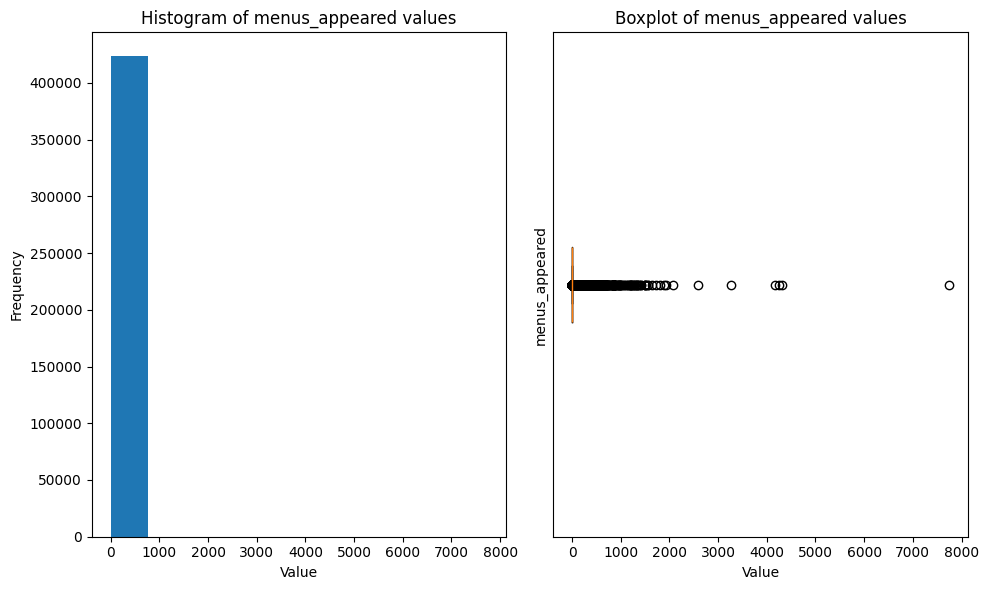

In [35]:
print(f"Min menus_appeared: {df['menus_appeared'].min()}, Max menus_appeared: {df['menus_appeared'].max()}")

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['menus_appeared'], bins=10)
plt.title('Histogram of menus_appeared values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['menus_appeared'], vert=False)
plt.title('Boxplot of menus_appeared values')
plt.xlabel('Value')
plt.ylabel('menus_appeared')
plt.yticks([])

plt.tight_layout()
plt.show()

Min times_appeared: -6, Max times_appeared: 8484


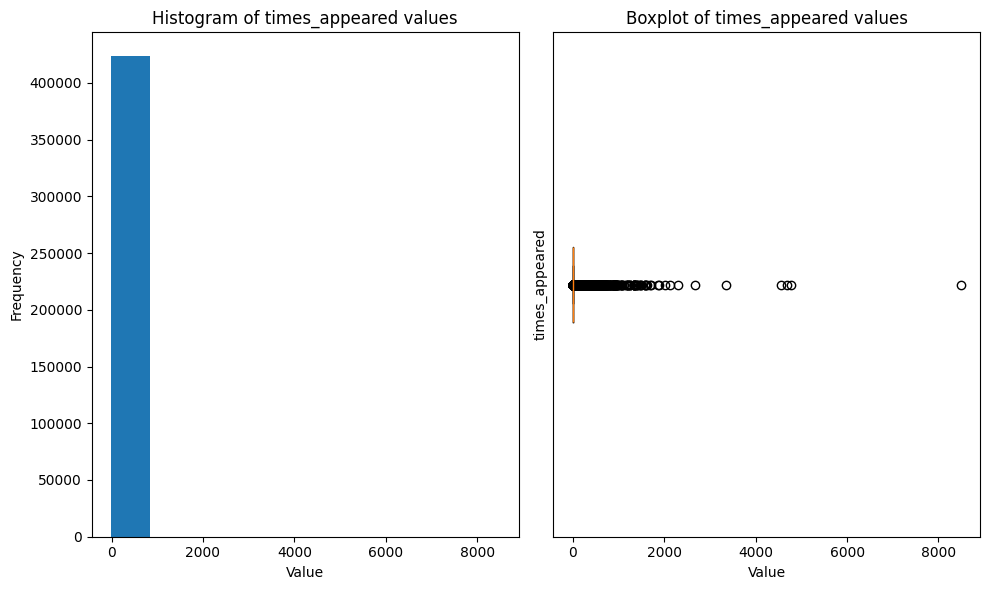

In [33]:
print(f"Min times_appeared: {df['times_appeared'].min()}, Max times_appeared: {df['times_appeared'].max()}")

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['times_appeared'], bins=10)
plt.title('Histogram of times_appeared values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['times_appeared'], vert=False)
plt.title('Boxplot of times_appeared values')
plt.xlabel('Value')
plt.ylabel('times_appeared')
plt.yticks([])

plt.tight_layout()
plt.show()

## Multiple Outliers in Years- Section 1.3

* Potential outliers in `first_appeared` column, as some of the values are in the 0 and 3000 years, which is not a possible year
* Potential outliers in `last_appeared` column, as some of the values are in the 0 and 3000 years, which is not a possible year

Min first_appeared: 0, Max first_appeared: 2928


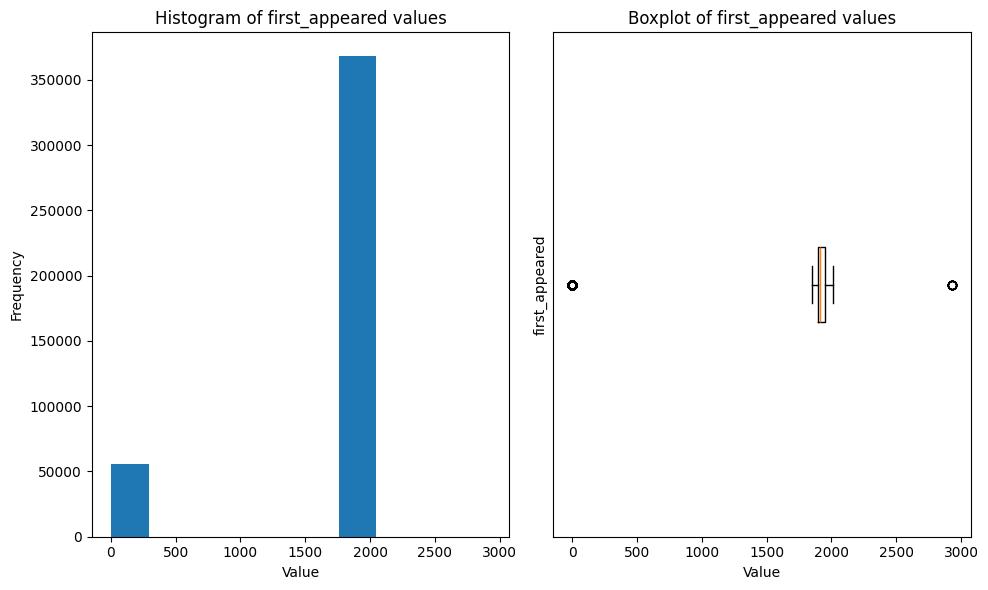

In [36]:
print(f"Min first_appeared: {df['first_appeared'].min()}, Max first_appeared: {df['first_appeared'].max()}")

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['first_appeared'], bins=10)
plt.title('Histogram of first_appeared values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['first_appeared'], vert=False)
plt.title('Boxplot of first_appeared values')
plt.xlabel('Value')
plt.ylabel('first_appeared')
plt.yticks([])

plt.tight_layout()
plt.show()

Min last_appeared: 0, Max last_appeared: 2928


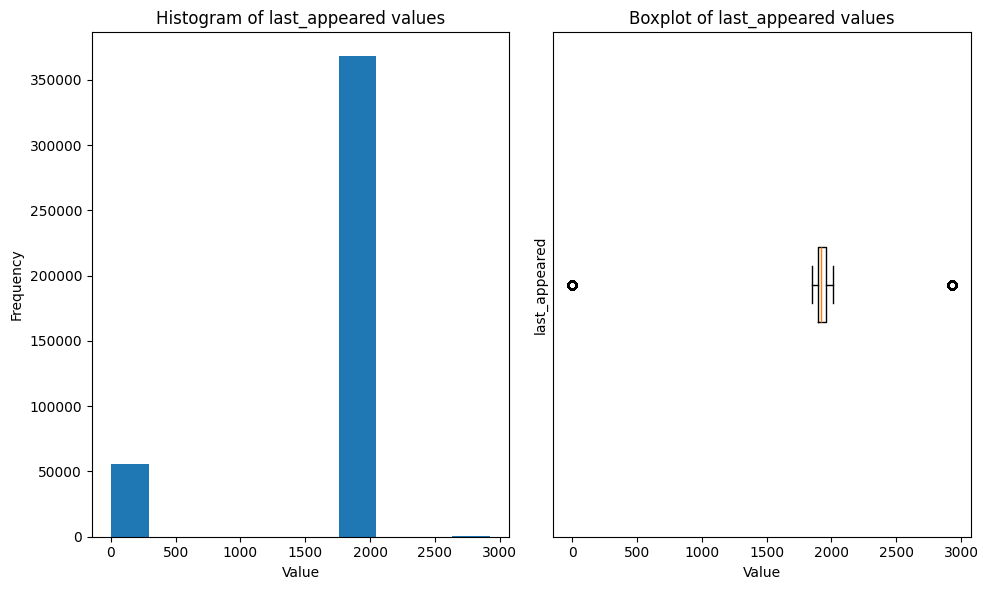

In [37]:
print(f"Min last_appeared: {df['last_appeared'].min()}, Max last_appeared: {df['last_appeared'].max()}")

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['last_appeared'], bins=10)
plt.title('Histogram of last_appeared values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['last_appeared'], vert=False)
plt.title('Boxplot of last_appeared values')
plt.xlabel('Value')
plt.ylabel('last_appeared')
plt.yticks([])

plt.tight_layout()
plt.show()

## Column Misconfigured - Section 1.4

* `first_appeared` and `last_appeared` columns are incorrectly auto-recognized as `int64`

In [40]:
df.dtypes

id                  int64
name               object
description       float64
menus_appeared      int64
times_appeared      int64
first_appeared      int64
last_appeared       int64
lowest_price      float64
highest_price     float64
dtype: object

## Multiple Outliers in Price - Section 1.5

* Potential outliers in `lowest_price` column, as some of the values are in the 1000s
* Potential outliers in `highest_price` column, as some of the values are in the 1000s

In [48]:
print(f"Min lowest_price: {df['lowest_price'].min()}, Max lowest_price: {df['lowest_price'].max()}")

df["lowest_price"].describe()

Min lowest_price: 0.0, Max lowest_price: 1035.0


count    394297.000000
mean          0.965265
std           6.714564
min           0.000000
25%           0.000000
50%           0.000000
75%           0.400000
max        1035.000000
Name: lowest_price, dtype: float64

In [49]:
print(f"Min highest_price: {df['highest_price'].min()}, Max highest_price: {df['highest_price'].max()}")

df["highest_price"].describe()

Min highest_price: 0.0, Max highest_price: 3050.0


count    394297.000000
mean          1.603875
std          12.696274
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max        3050.000000
Name: highest_price, dtype: float64